In [ ]:
'''
http://cs231n.github.io/neural-networks-case-study/
'''

In [1]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

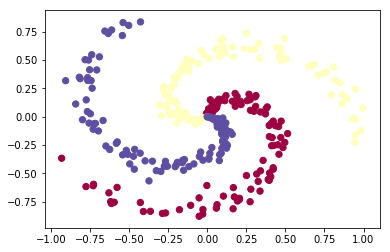

In [6]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [19]:
# Train a softmax linear classifier
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

In [20]:
print(W.shape)

(2, 3)


In [22]:
print(W);print(b)

[[ 0.02834616 -0.00137991  0.00585561]
 [-0.00223004  0.01218659  0.00397209]]
[[ 0.  0.  0.]]


In [26]:
scores = np.dot(X, W) + b

In [28]:
print(scores[1,:])

[ -5.22563725e-06   1.22032861e-04   4.36144798e-05]


In [29]:
num_examples = X.shape[0]
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

In [31]:
a = np.sum(exp_scores, axis = 1, keepdims = True)

In [34]:
print(a.shape); print(exp_scores.shape); print(probs.shape)

(300, 1)
(300, 3)
(300, 3)


In [37]:
correct_logprobs = -np.log(probs[range(num_examples), y])

In [38]:
print(correct_logprobs.shape)

(300,)


In [39]:
data_loss = np.sum(correct_logprobs) / num_examples

In [40]:
print(data_loss)

1.09678122406


In [42]:
reg = 0.01

In [43]:
reg_loss = 0.5 * reg * np.sum(W * W)

In [44]:
loss = data_loss + reg_loss

In [46]:
print(loss); print(reg_loss)

1.09678626886
5.04480355719e-06


In [47]:
dscores = probs

In [48]:
dscores[range(num_examples), y] -= 1

In [49]:
print(dscores.shape)

(300, 3)


In [50]:
dscores /= num_examples

In [51]:
dW = np.dot(X.T, dscores)

In [52]:
print(dW)

[[-0.03871712 -0.05663507  0.09535219]
 [ 0.08466473 -0.10092762  0.01626289]]


In [53]:
db = np.sum(dscores, axis = 0, keepdims = True)

In [54]:
print(db.shape)

(1, 3)


In [55]:
print(db)

[[  1.38303441e-05  -2.90445800e-05   1.52142359e-05]]


In [56]:
dW += reg * W

In [57]:
print(dW.shape)

(2, 3)


In [61]:
# Train a linear classifier
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]
for i in range(301):
    # scores: N * K
    scores = np.dot(X, W) + b
    
    exp_scores = np.exp(scores)
    # probs: N *K
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    if i % 50 == 0:
        print("Iteration %d: loss %f" % (i, loss))
        
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    
    dW += reg * W
    
    W += -step_size * dW
    b += - step_size * db

Iteration 0: loss 1.097094
Iteration 50: loss 0.774817
Iteration 100: loss 0.760899
Iteration 150: loss 0.758912
Iteration 200: loss 0.758533
Iteration 250: loss 0.758453
Iteration 300: loss 0.758435


In [62]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis = 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.51


In [64]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [66]:
print(xx.shape); print(yy.shape)

(186, 197)
(186, 197)


In [68]:
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b

In [74]:
Z = np.argmax(Z, axis = 1)

In [76]:
print(Z.shape);print(Z)

(36642,)
[2 2 2 ..., 1 1 1]


In [78]:
Z = Z.reshape(xx.shape)

In [79]:
print(Z.shape)

(186, 197)


In [80]:
fig = plt.figure()

In [81]:
plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral, alpha=0.8)

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [83]:
plt.xlim(xx.min(), xx.max())

(-1.9308233660047027, 1.9891766339953008)

In [84]:
plt.ylim(yy.min(), yy.max())

(-1.877281180302198, 1.8227188196978052)

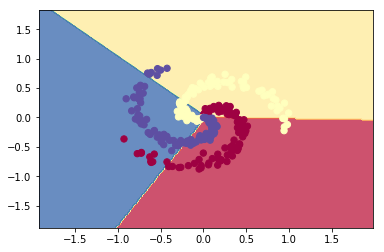

In [85]:
fig

In [86]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

In [87]:
hidden_layer = np.dot(X, W) + b

In [88]:
hidden_layer = np.maximum(0, hidden_layer) # ReLU activation

In [90]:
scores = np.dot(hidden_layer, W2) + b2

In [93]:
print(scores.shape); print(hidden_layer.shape)

(300, 3)
(300, 100)


In [95]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]
for i in range(10000):
    hidden_layer = np.dot(X, W) + b
    hidden_layer = np.maximum(0, hidden_layer)
    
    scores = np.dot(hidden_layer, W2) + b2
    
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 2000 == 0:
        print("iteration %d: loss: %f" % (i, loss))
        
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backpropate the gradient to the parameters
    # first backprop into paramters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis = 0, keepdims = True)
    
    # into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W, b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis = 0, keepdims = True)
    
    dW2 += reg * W2
    dW += reg * W
    
    W += -step_size * dW
    b += -step_size * db
    
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss: 1.098779
iteration 2000: loss: 0.271640
iteration 4000: loss: 0.252219
iteration 6000: loss: 0.246806
iteration 8000: loss: 0.245554


In [97]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


In [98]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.877281180302198, 1.8227188196978052)

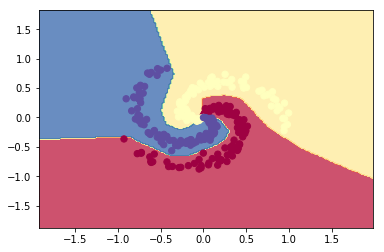

In [99]:
fig